Selected: legacy_fut
Downloaded single year data from: 2023
Stored the file annual.txt in the working directory.


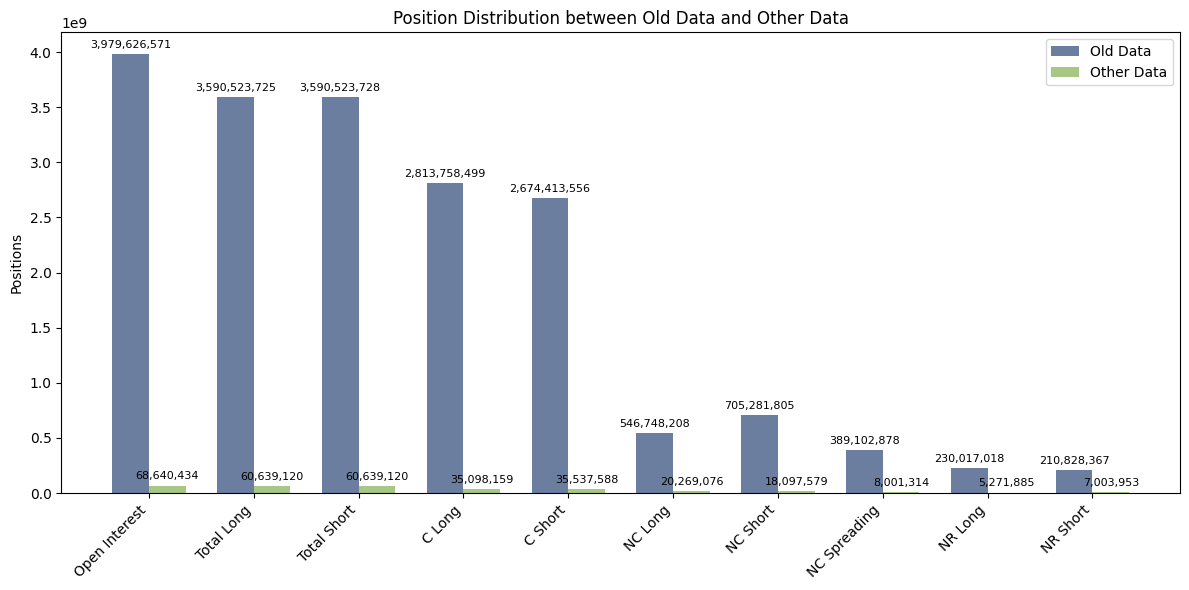

Selected: disaggregated_fut
Downloaded single year data from: 2023
Stored the file f_year.txt in the working directory.


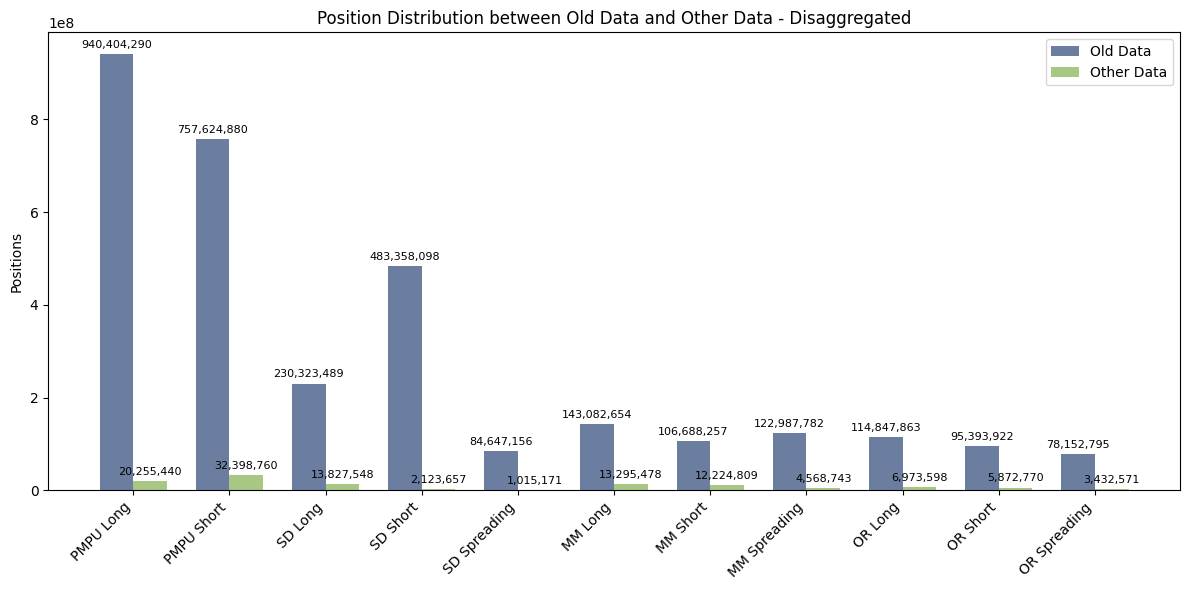

In [1]:
import cot_reports as cot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch COT data
data = cot.cot_year(year=2023, cot_report_type='legacy_fut')

# Filter relevant columns
categories = ['Open Interest', 'Total Long', 'Total Short', 'C Long', 'C Short',
              'NC Long', 'NC Short', 'NC Spreading', 'NR Long', 'NR Short']

def calculate_positions(df, prefix):
    """ Aggregate data for chart categories """
    return {
        'Open Interest': df[f'Open Interest ({prefix})'].sum(),
        'Total Long': (
            df[f'Noncommercial Positions-Long ({prefix})'] +
            df[f'Commercial Positions-Long ({prefix})'] +
            df[f'Nonreportable Positions-Long ({prefix})']
        ).sum(),
        'Total Short': (
            df[f'Noncommercial Positions-Short ({prefix})'] +
            df[f'Commercial Positions-Short ({prefix})'] +
            df[f'Nonreportable Positions-Short ({prefix})']
        ).sum(),
        'C Long': df[f'Commercial Positions-Long ({prefix})'].sum(),
        'C Short': df[f'Commercial Positions-Short ({prefix})'].sum(),
        'NC Long': df[f'Noncommercial Positions-Long ({prefix})'].sum(),
        'NC Short': df[f'Noncommercial Positions-Short ({prefix})'].sum(),
        'NC Spreading': df[f'Noncommercial Positions-Spreading ({prefix})'].sum(),
        'NR Long': df[f'Nonreportable Positions-Long ({prefix})'].sum(),
        'NR Short': df[f'Nonreportable Positions-Short ({prefix})'].sum(),
    }

# Calculate positions for Old and Other data
old_positions = calculate_positions(data, 'Old')
other_positions = calculate_positions(data, 'Other')

# Plot the results
x = np.arange(len(categories))
old_values = [old_positions[cat] for cat in categories]
other_values = [other_positions[cat] for cat in categories]
bar_width = 0.35

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - bar_width / 2, old_values, bar_width, label='Old Data', color='#6B7E9F')
bars2 = ax.bar(x + bar_width / 2, other_values, bar_width, label='Other Data', color='#A9C784')

# Add text labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Finalize plot
ax.set_ylabel('Positions')
ax.set_title('Position Distribution between Old Data and Other Data')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()




import cot_reports as cot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch Disaggregated COT data
data = cot.cot_year(year=2023, cot_report_type='disaggregated_fut')

# Define categories and corresponding columns
categories = ['PMPU Long', 'PMPU Short', 'SD Long', 'SD Short', 'SD Spreading',
              'MM Long', 'MM Short', 'MM Spreading', 'OR Long', 'OR Short', 'OR Spreading']

column_mapping = {
    'PMPU Long': 'Prod_Merc_Positions_Long_',
    'PMPU Short': 'Prod_Merc_Positions_Short_',
    'SD Long': 'Swap_Positions_Long_',
    'SD Short': 'Swap__Positions_Short_',
    'SD Spreading': 'Swap__Positions_Spread_',
    'MM Long': 'M_Money_Positions_Long_',
    'MM Short': 'M_Money_Positions_Short_',
    'MM Spreading': 'M_Money_Positions_Spread_',
    'OR Long': 'Other_Rept_Positions_Long_',
    'OR Short': 'Other_Rept_Positions_Short_',
    'OR Spreading': 'Other_Rept_Positions_Spread_'
}

# Function to calculate positions for given data and column prefix
def calculate_disagg_positions(df, suffix):
    results = {}
    for cat, col_prefix in column_mapping.items():
        column_name = col_prefix + suffix
        results[cat] = df[column_name].sum()
    return results

# Calculate positions for Old and Other data
old_positions = calculate_disagg_positions(data, 'Old')
other_positions = calculate_disagg_positions(data, 'Other')

# Prepare data for plotting
x = np.arange(len(categories))
old_values = [old_positions[cat] for cat in categories]
other_values = [other_positions[cat] for cat in categories]
bar_width = 0.35

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - bar_width / 2, old_values, bar_width, label='Old Data', color='#6B7E9F')
bars2 = ax.bar(x + bar_width / 2, other_values, bar_width, label='Other Data', color='#A9C784')

# Add text labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Customize chart
ax.set_ylabel('Positions')
ax.set_title('Position Distribution between Old Data and Other Data - Disaggregated')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()